# Heart Disease Prediction Using Machine Learning Classification Models

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay


# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

In [4]:
%matplotlib inline

## **Data Description**
The dataset used in this analysis is the **Behavioral Risk Factor Surveillance System (BRFSS)** dataset. It consists of **319,795 rows** and **18 columns**. The goal is to explore the data, understand factors contributing to heart disease, and build a predictive model.

The dataset contains the following features:

- **HeartDisease**: Indicates whether the person has heart disease (Yes/No).
- **BMI**: Body Mass Index of the individual.
- **Smoking**: Whether the individual is a smoker (Yes/No).
- **AlcoholDrinking**: Indicates excessive alcohol consumption (Yes/No).
- **Stroke**: Whether the individual has experienced a stroke (Yes/No).
- **PhysicalHealth**: Number of physically unhealthy days in the past 30 days.
- **MentalHealth**: Number of mentally unhealthy days in the past 30 days.
- **DiffWalking**: Indicates difficulty walking or climbing stairs (Yes/No).
- **Sex**: Gender of the individual.
- **AgeCategory**: Age group category (e.g., 35-44, 45-54, etc.).
- **Race**: Race or ethnicity of the individual.
- **Diabetic**: Indicates whether the person has diabetes (Yes/No).
- **PhysicalActivity**: Engagement in physical activity in the past 30 days (Yes/No).
- **GenHealth**: Self-reported general health status (Excellent, Very Good, Good, Fair, or Poor).
- **SleepTime**: Average hours of sleep per day.
- **Asthma**: Indicates whether the individual has asthma (Yes/No).
- **KidneyDisease**: Indicates kidney disease (Yes/No).
- **SkinCancer**: Indicates skin cancer diagnosis (Yes/No).n cancer (Yes/No).
: History of skin cancer (Yes/No).


In [6]:
# Load the dataset
data = pd.read_csv('heart.csv' )

In [7]:
# Display the data shape
data.shape

(319795, 18)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [9]:
# Display the top 5 columns
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


### Data Cleaning

In [11]:
# Retrieve Columns name
columns_df = list(data.columns.values)

# Display all unique values of each column in the dataframe
for column in columns_df:
    print(column, ':', str(data[column].unique()))

HeartDisease : ['No' 'Yes']
BMI : [16.6  20.34 26.58 ... 62.42 51.46 46.56]
Smoking : ['Yes' 'No']
AlcoholDrinking : ['No' 'Yes']
Stroke : ['No' 'Yes']
PhysicalHealth : [ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]
MentalHealth : [30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]
DiffWalking : ['No' 'Yes']
Sex : ['Female' 'Male']
AgeCategory : ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Race : ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Diabetic : ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
PhysicalActivity : ['Yes' 'No']
GenHealth : ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
SleepTime : [ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22. 23.]
Asthma : ['Yes' 'No']

In [12]:
# Display the number of missing values
data.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [13]:
# Display the number of duplicates
print(f"Number of duplicates found: {data.duplicated().sum()}")

Number of duplicates found: 18078


In [14]:
# Remove duplicates
data.drop_duplicates(inplace= True)

In [15]:
# Display Data shape after removing duplicates
data.shape

(301717, 18)

In [16]:
# Show description numeric Values
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,301717.000000,301717.000000,301717.000000,301717.000000
mean,28.441970,3.572298,4.121475,7.084559
std,6.468134,8.140656,8.128288,1.467122
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.410000,0.000000,0.000000,7.000000
75%,31.650000,2.000000,4.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


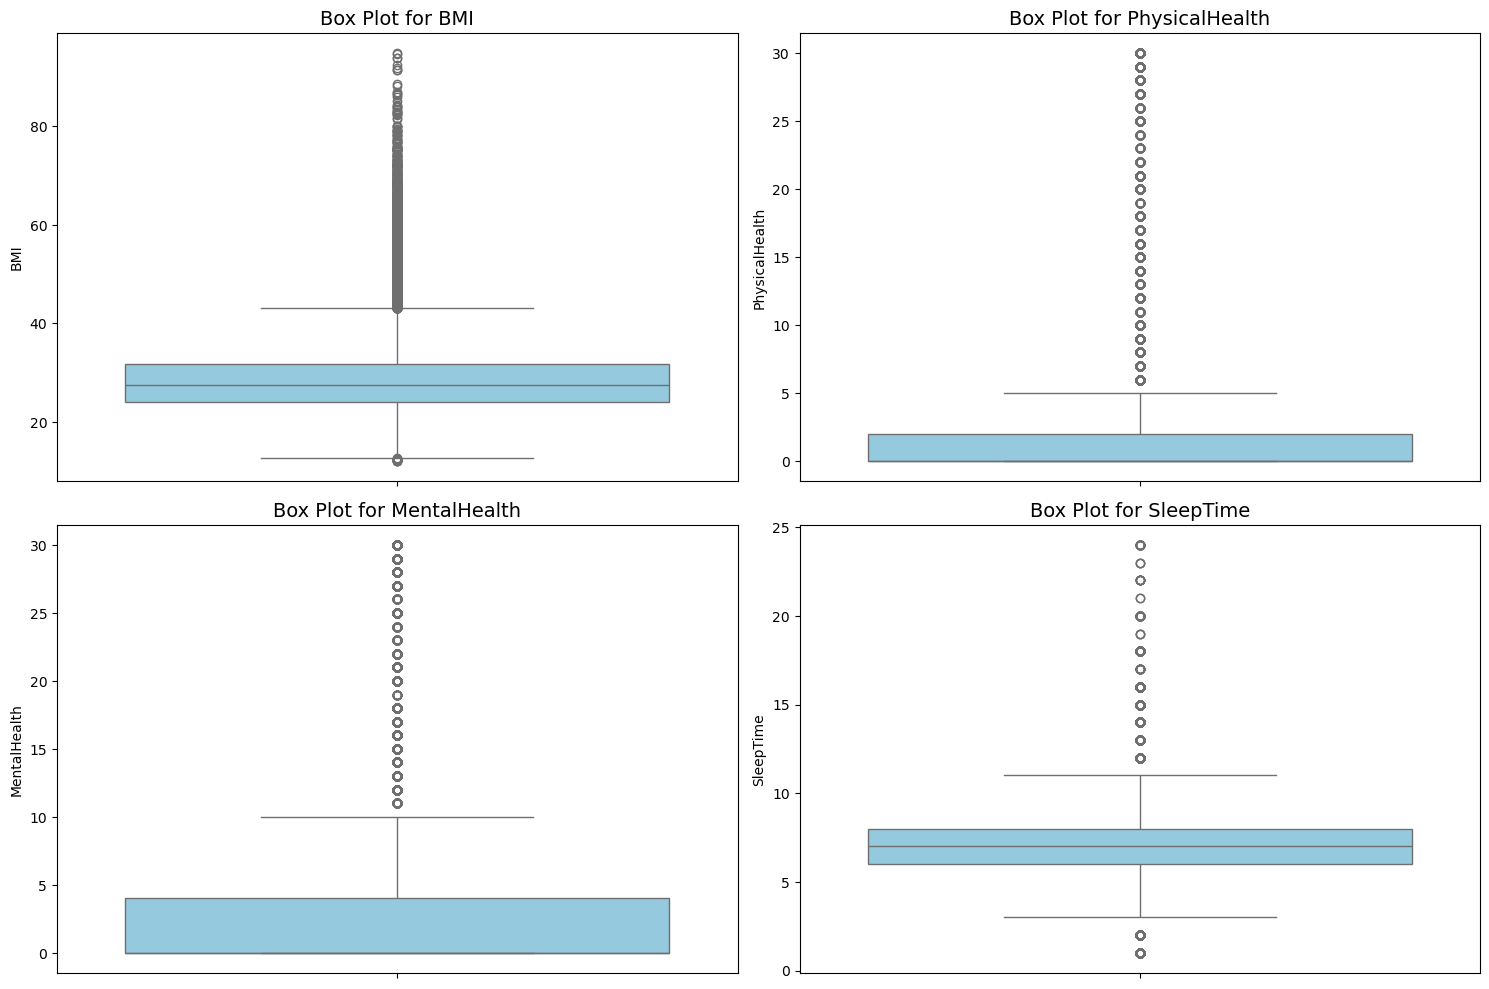

In [17]:
# Create box plots to check for outliers
numerical_cols = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols,1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=data[col], color='skyblue')
    plt.title(f'Box Plot for {col}', fontsize=14)

plt.tight_layout()
plt.show()


In [18]:
# Remove outliers for SleepTime as they are unrealistic

# Calculate Q1 and Q3
Q1 = data['SleepTime'].quantile(0.25)
Q3 = data['SleepTime'].quantile(0.75)
IQR = Q3 - Q1

# Define the non-outliers ranges
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['SleepTime'] < lower_bound) | (data['SleepTime'] > upper_bound)]

# Remove outliers
data = data[(data['SleepTime'] >= lower_bound) & (data['SleepTime'] <= upper_bound)]

# Display the number of outliers removed
num_outliers_removed = outliers.shape[0]
print(f"Number of outliers removed: {num_outliers_removed}")

# Display the shape of the cleaned dataset

print("Cleaned Dataset Shape:", data.shape)

Number of outliers removed: 4542
Cleaned Dataset Shape: (297175, 18)


### EDA

Exploratory Data Analysis (EDA) is an analysis approach that identifies general patterns in the data. These patterns include outliers and features of the data that might be unexpected

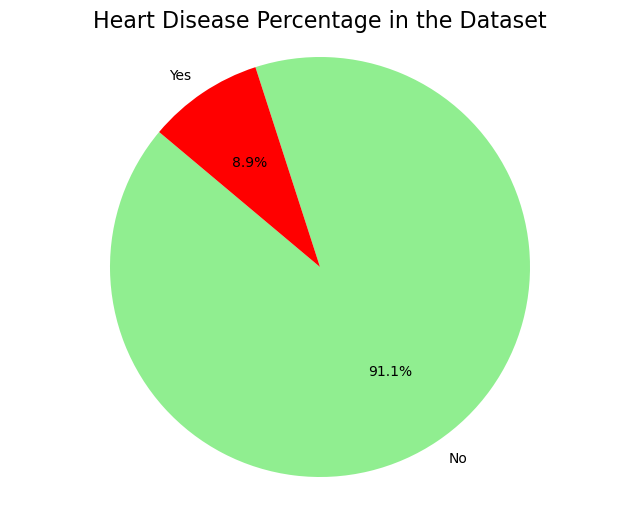

HeartDisease
No     270686
Yes     26489
Name: count, dtype: int64
HeartDisease
No     91.086397
Yes     8.913603
Name: count, dtype: float64


In [21]:
# Calculate heart disease counts
heart_disease_counts = data['HeartDisease'].value_counts()

# Calculate percentages
heart_disease_percentage = heart_disease_counts / heart_disease_counts.sum() * 100

# Plot the heart disease distribution as a pie chart
plt.figure(figsize=(8, 6))
plt.pie(heart_disease_percentage, labels=heart_disease_percentage.index, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'red'])
plt.title('Heart Disease Percentage in the Dataset', fontsize=16)
plt.axis('equal')
plt.show()

# Display the heart disease counts and percentages
print(heart_disease_counts)
print(heart_disease_percentage)

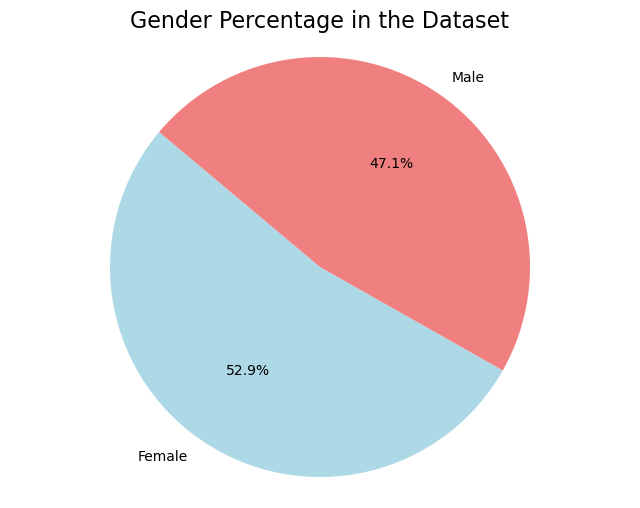

Sex
Female    157251
Male      139924
Name: count, dtype: int64
Sex
Female    52.915286
Male      47.084714
Name: count, dtype: float64


In [22]:
# Calculate gender counts
gender_counts = data['Sex'].value_counts()

# Calculate percentages
gender_percentage = gender_counts / gender_counts.sum() * 100

# Plot the gender distribution as a pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_percentage, labels=gender_percentage.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
plt.title('Gender Percentage in the Dataset', fontsize=16)
plt.axis('equal')
plt.show()

# Display the gender counts and percentages
print(gender_counts)
print(gender_percentage)

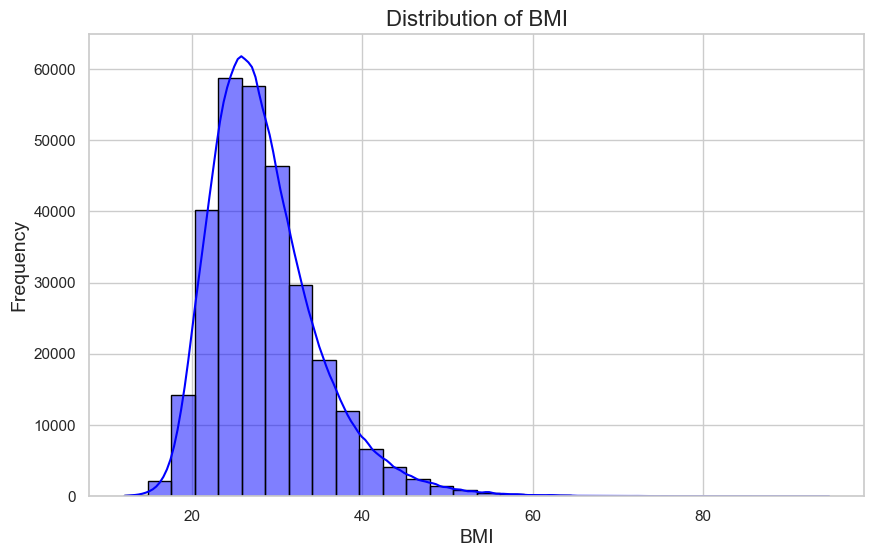

In [23]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create a histogram for BMI
plt.figure(figsize=(10, 6))
sns.histplot(data['BMI'], bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of BMI', fontsize=16)
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

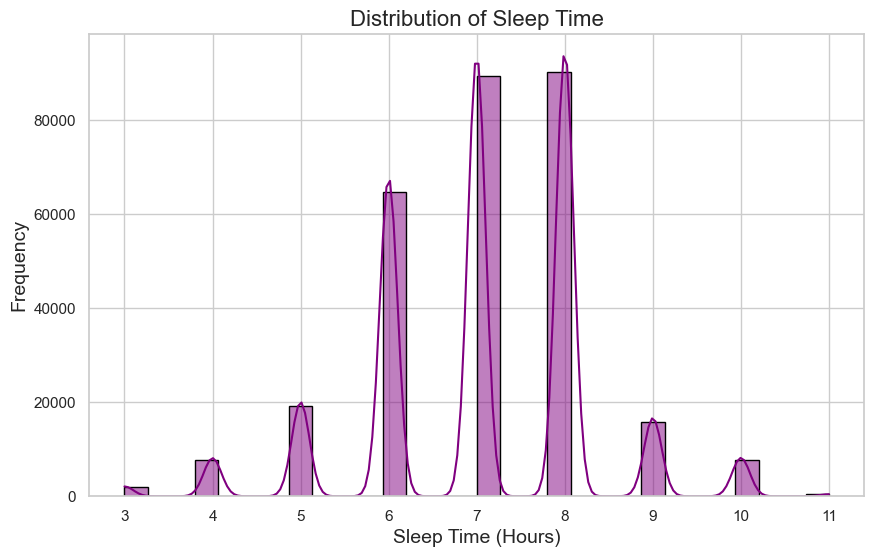

In [24]:
# Create a histogram for Sleep Time
plt.figure(figsize=(10, 6))
sns.histplot(data['SleepTime'], bins=30, kde=True, color='purple', edgecolor='black')
plt.title('Distribution of Sleep Time', fontsize=16)
plt.xlabel('Sleep Time (Hours)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

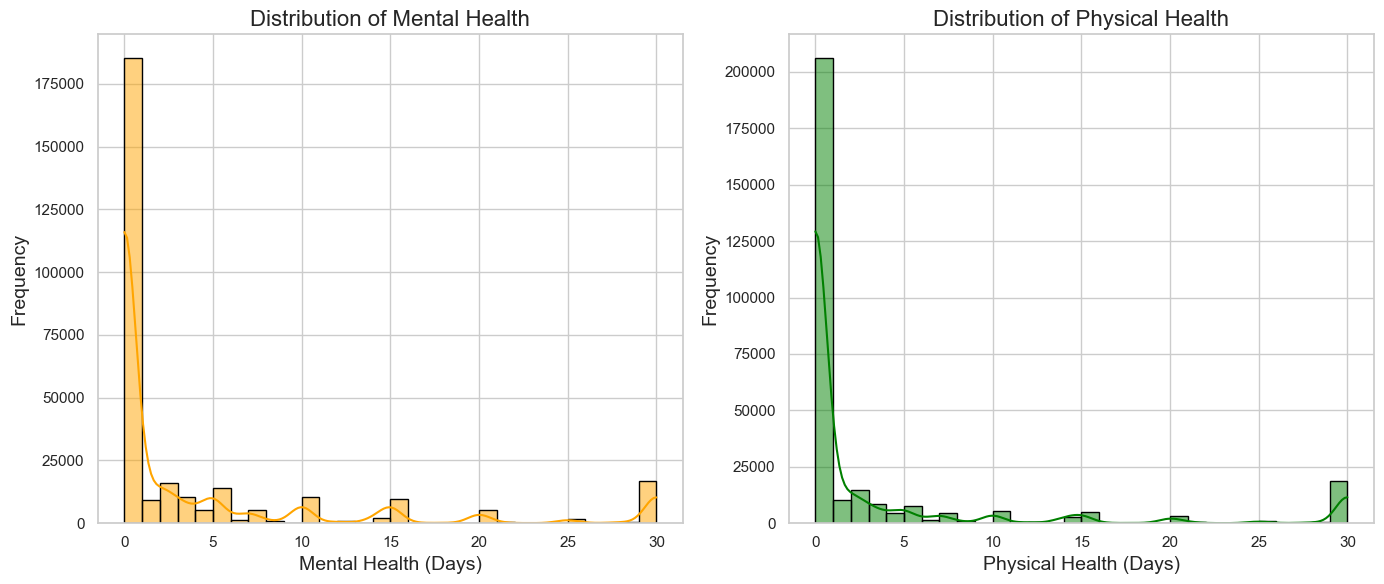

In [25]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Mental Health Distribution
sns.histplot(data['MentalHealth'], bins=30, kde=True, color='orange', edgecolor='black', ax=axes[0])
axes[0].set_title('Distribution of Mental Health', fontsize=16)
axes[0].set_xlabel('Mental Health (Days)', fontsize=14)
axes[0].set_ylabel('Frequency', fontsize=14)

# Physical Health Distribution
sns.histplot(data['PhysicalHealth'], bins=30, kde=True, color='green', edgecolor='black', ax=axes[1])
axes[1].set_title('Distribution of Physical Health', fontsize=16)
axes[1].set_xlabel('Physical Health (Days)', fontsize=14)
axes[1].set_ylabel('Frequency', fontsize=14)

plt.tight_layout()
plt.show()

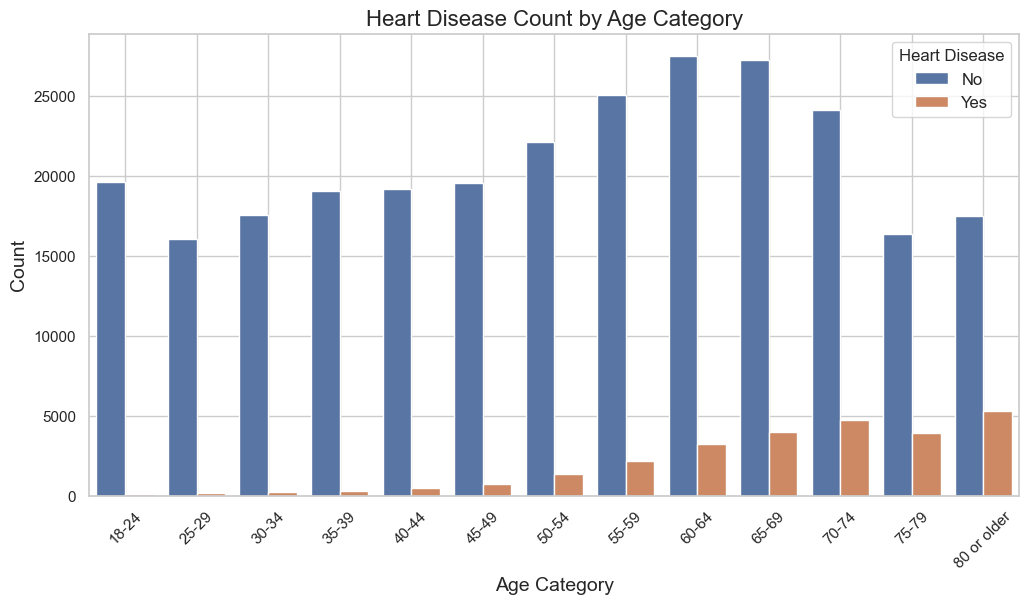

In [26]:
# Define the age order
age_order = ['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80 or older']

# Create a count plot for Heart Disease by Age Category
plt.figure(figsize=(12, 6))
sns.countplot(x='AgeCategory', hue='HeartDisease', data=data, order=age_order)
plt.title('Heart Disease Count by Age Category', fontsize=16)
plt.xlabel('Age Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Heart Disease', loc='upper right', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

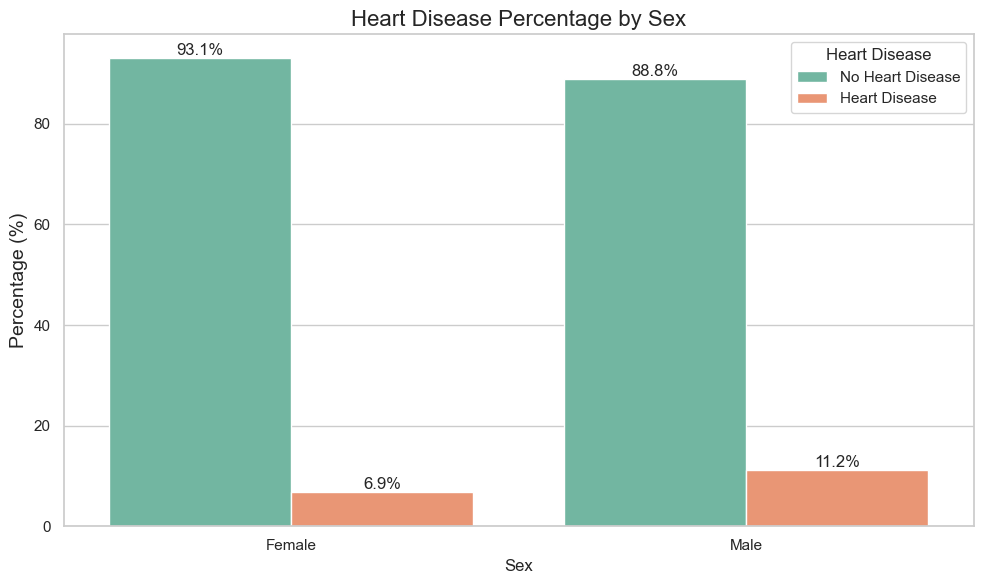

In [27]:
# Calculate the counts of each category
grouped_data = data.groupby(['Sex', 'HeartDisease']).size().reset_index(name='count')

# Calculate the percentage for each group
total_counts = grouped_data.groupby('Sex')['count'].transform('sum')
grouped_data['percentage'] = (grouped_data['count'] / total_counts) * 100

# Set up the figure and axes
fig, axes = plt.subplots(1, 1, figsize=(10, 6))

# Create the bar plot with percentages
sns.barplot(ax=axes, x='Sex', y='percentage', hue='HeartDisease', data=grouped_data, palette='Set2')

# Customize the plot
axes.set_title('Heart Disease Percentage by Sex', fontsize=16)
axes.set_ylabel('Percentage (%)', fontsize=14)

# Set the legend
handles, labels = axes.get_legend_handles_labels()
axes.legend(handles=handles, labels=['No Heart Disease', 'Heart Disease'], title='Heart Disease')

# Add percentages on top of the bars
for container in axes.containers:
    for bar in container:
        height = bar.get_height()
        axes.annotate(f'{height:.1f}%',
                      (bar.get_x() + bar.get_width() / 2, height),
                      ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

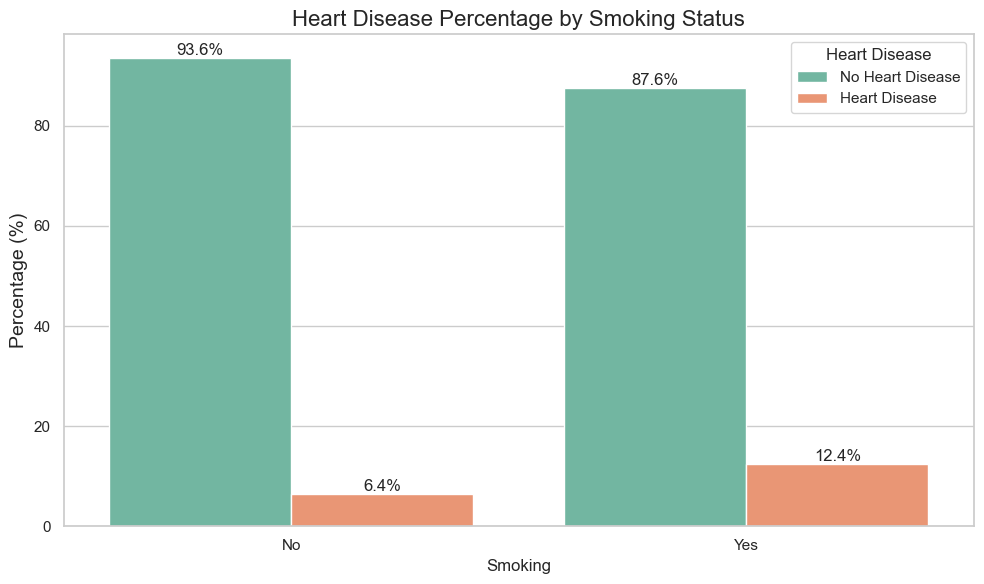

In [28]:
# Calculate the counts of each category
grouped_data = data.groupby(['Smoking', 'HeartDisease']).size().reset_index(name='count')

# Calculate the percentage for each group
total_counts = grouped_data.groupby('Smoking')['count'].transform('sum')
grouped_data['percentage'] = (grouped_data['count'] / total_counts) * 100

# Set up the figure and axes
fig, axes = plt.subplots(1, 1, figsize=(10, 6))

# Create the bar plot with percentages
sns.barplot(ax=axes, x='Smoking', y='percentage', hue='HeartDisease', data=grouped_data, palette='Set2')

# Customize the plot
axes.set_title('Heart Disease Percentage by Smoking Status', fontsize=16)
axes.set_ylabel('Percentage (%)', fontsize=14)

# Set the legend
handles, labels = axes.get_legend_handles_labels()
axes.legend(handles=handles, labels=['No Heart Disease', 'Heart Disease'], title='Heart Disease')

# Add percentages on top of the bars
for container in axes.containers:
    for bar in container:
        height = bar.get_height()
        axes.annotate(f'{height:.1f}%',
                      (bar.get_x() + bar.get_width() / 2, height),
                      ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

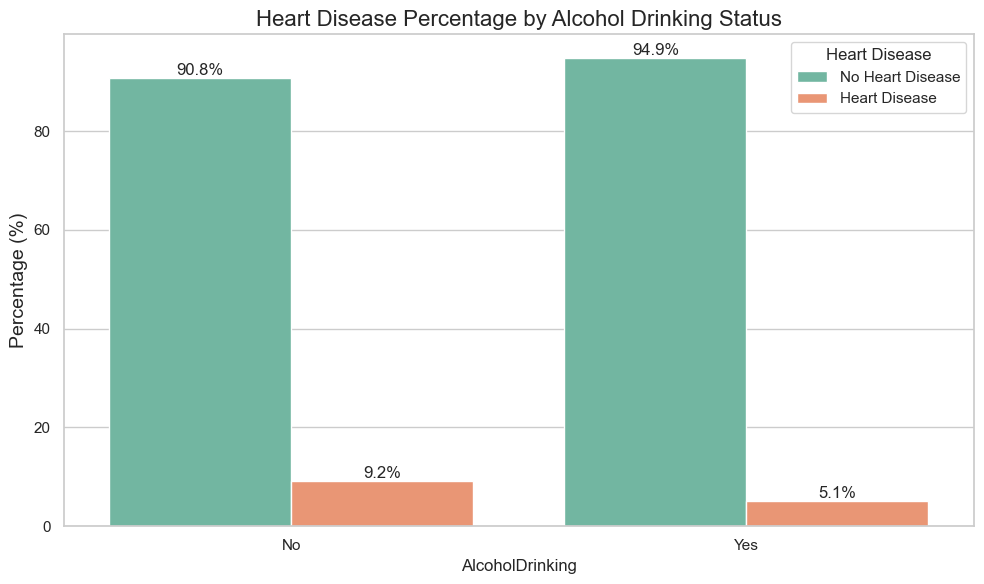

In [29]:
# Calculate the counts of each category
grouped_data = data.groupby(['AlcoholDrinking', 'HeartDisease']).size().reset_index(name='count')

# Calculate the percentage for each group
total_counts = grouped_data.groupby('AlcoholDrinking')['count'].transform('sum')
grouped_data['percentage'] = (grouped_data['count'] / total_counts) * 100

# Set up the figure and axes
fig, axes = plt.subplots(1, 1, figsize=(10, 6))

# Create the bar plot with percentages
sns.barplot(ax=axes, x='AlcoholDrinking', y='percentage', hue='HeartDisease', data=grouped_data, palette='Set2')

# Step 5: Customize the plot
axes.set_title('Heart Disease Percentage by Alcohol Drinking Status', fontsize=16)
axes.set_ylabel('Percentage (%)', fontsize=14)

# Set the legend
handles, labels = axes.get_legend_handles_labels()
axes.legend(handles=handles, labels=['No Heart Disease', 'Heart Disease'], title='Heart Disease')


# Add percentages on top of the bars
for container in axes.containers:
    for bar in container:
        height = bar.get_height()
        axes.annotate(f'{height:.1f}%',
                      (bar.get_x() + bar.get_width() / 2, height),
                      ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

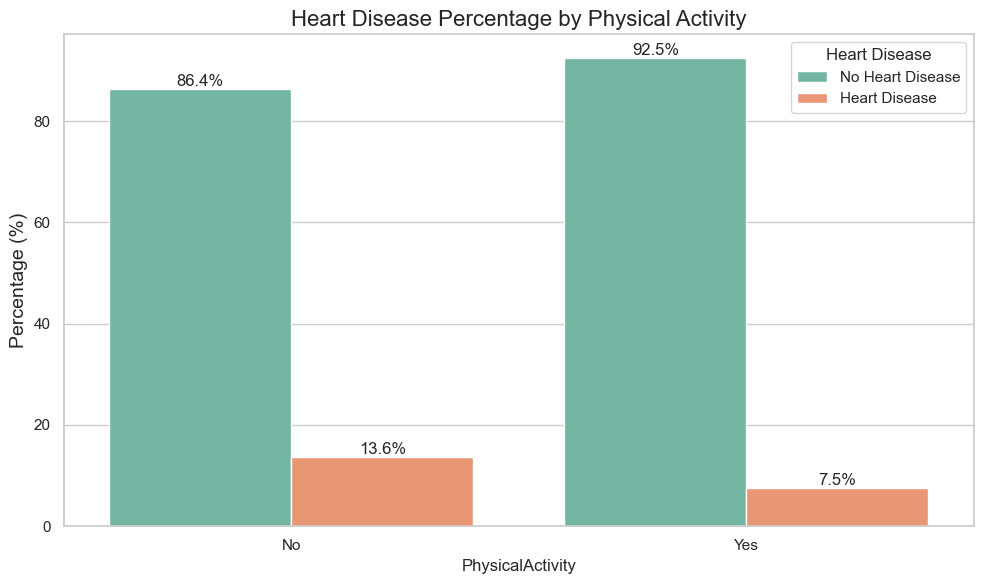

In [30]:
# Calculate the counts of each category
grouped_data = data.groupby(['PhysicalActivity', 'HeartDisease']).size().reset_index(name='count')

# Calculate the percentage for each group
total_counts = grouped_data.groupby('PhysicalActivity')['count'].transform('sum')
grouped_data['percentage'] = (grouped_data['count'] / total_counts) * 100

# Set up the figure and axes
fig, axes = plt.subplots(1, 1, figsize=(10, 6))

# Create the count plot with percentages
sns.barplot(ax=axes, x='PhysicalActivity', y='percentage', hue='HeartDisease', data=grouped_data, palette='Set2')

# Customize the plot
axes.set_title('Heart Disease Percentage by Physical Activity', fontsize=16)
axes.set_ylabel('Percentage (%)', fontsize=14)

# Set the legend
handles, labels = axes.get_legend_handles_labels()
axes.legend(handles=handles, labels=['No Heart Disease', 'Heart Disease'], title='Heart Disease')

# Add percentages on top of the bars
for container in axes.containers:
    for bar in container:
        height = bar.get_height()
        axes.annotate(f'{height:.1f}%',
                      (bar.get_x() + bar.get_width() / 2, height),
                      ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

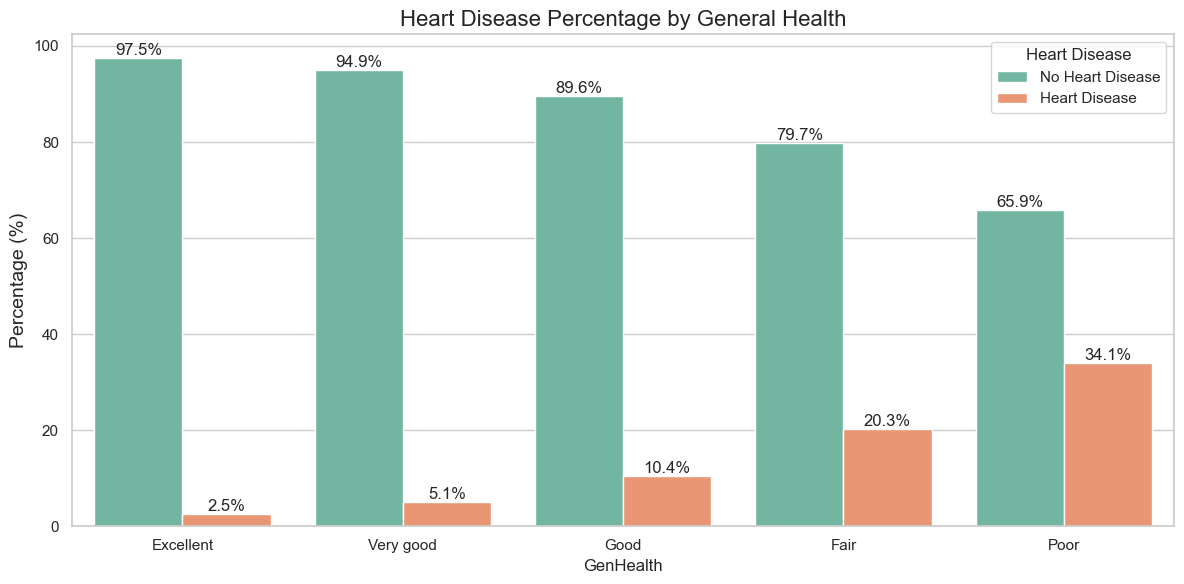

In [31]:
# Calculate the counts of each category
grouped_data = data.groupby(['GenHealth', 'HeartDisease']).size().reset_index(name='count')

# Calculate the percentage for each group
total_counts = grouped_data.groupby('GenHealth')['count'].transform('sum')
grouped_data['percentage'] = (grouped_data['count'] / total_counts) * 100

# Sort the data by percentage
grouped_data = grouped_data.sort_values(by='percentage', ascending=False)

# Set up the figure and axes
fig, axes = plt.subplots(1, 1, figsize=(12, 6))

# Create the bar plot with percentages
sns.barplot(ax=axes, x='GenHealth', y='percentage', hue='HeartDisease', data=grouped_data, palette='Set2')

# Customize the plot
axes.set_title('Heart Disease Percentage by General Health', fontsize=16)
axes.set_ylabel('Percentage (%)', fontsize=14)

# Set the legend
handles, labels = axes.get_legend_handles_labels()
axes.legend(handles=handles, labels=['No Heart Disease', 'Heart Disease'], title='Heart Disease')

# Add percentages on top of the bars
for container in axes.containers:
    for bar in container:
        height = bar.get_height()
        axes.annotate(f'{height:.1f}%',
                      (bar.get_x() + bar.get_width() / 2, height),
                      ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

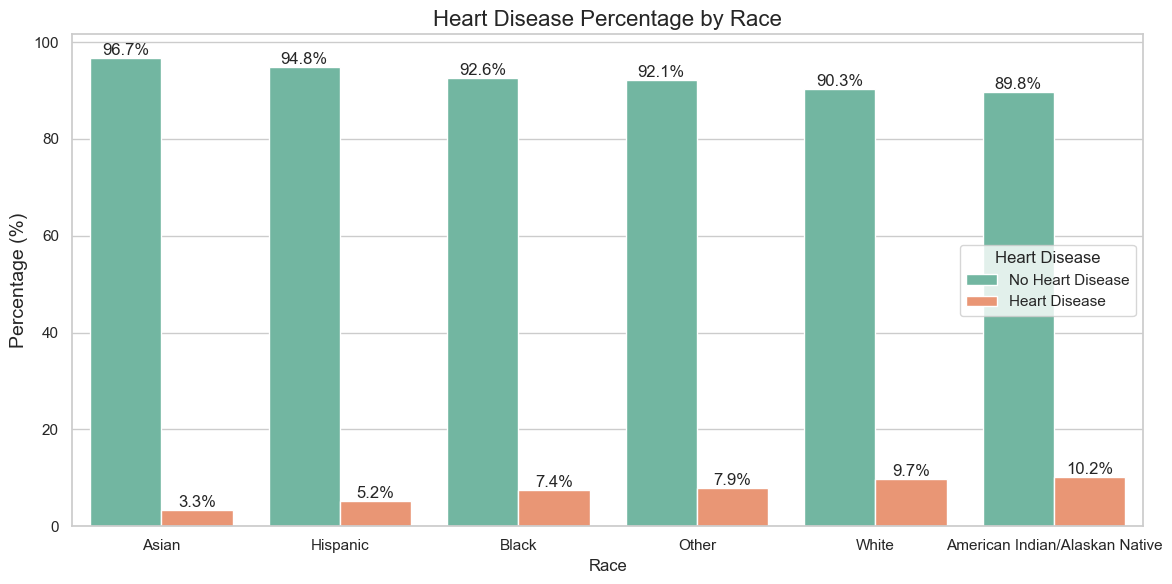

In [32]:
# Calculate the counts of each category
grouped_data = data.groupby(['Race', 'HeartDisease']).size().reset_index(name='count')

# Calculate the percentage for each group
total_counts = grouped_data.groupby('Race')['count'].transform('sum')
grouped_data['percentage'] = (grouped_data['count'] / total_counts) * 100

# Sort the data by percentage
grouped_data = grouped_data.sort_values(by='percentage', ascending=False)

# Set up the figure and axes
fig, axes = plt.subplots(1, 1, figsize=(12, 6))

# Create the bar plot with percentages, ordered by percentage
sns.barplot(ax=axes, x='Race', y='percentage', hue='HeartDisease', data=grouped_data, palette='Set2')

# Customize the plot
axes.set_title('Heart Disease Percentage by Race', fontsize=16)
axes.set_ylabel('Percentage (%)', fontsize=14)

# Set the legend
handles, labels = axes.get_legend_handles_labels()
axes.legend(handles=handles, labels=['No Heart Disease', 'Heart Disease'], title='Heart Disease' ,loc='center right')

# Add percentages on top of the bars
for container in axes.containers:
    for bar in container:
        height = bar.get_height()
        axes.annotate(f'{height:.1f}%',
                      (bar.get_x() + bar.get_width() / 2, height),
                      ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

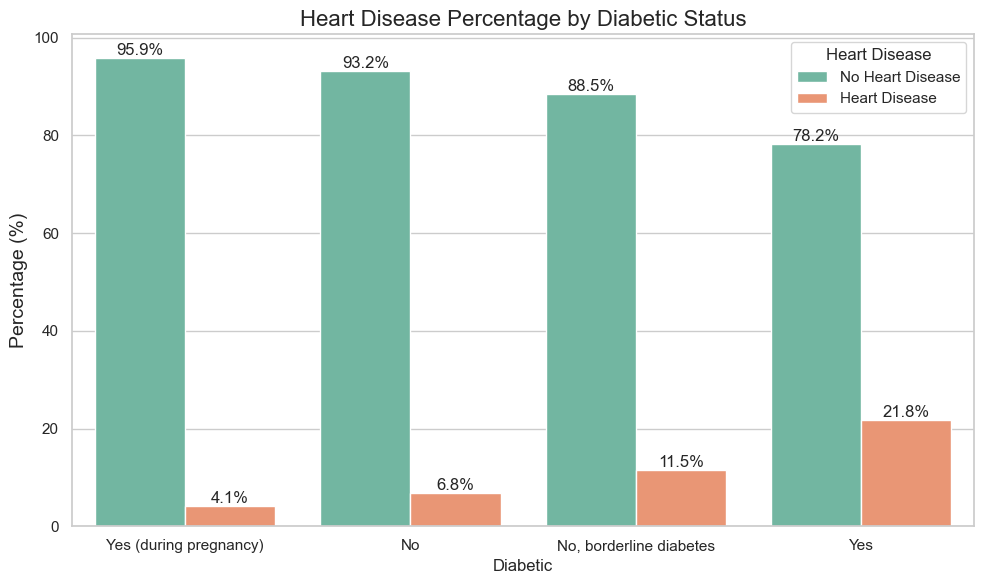

In [33]:
# Calculate the counts of each category
grouped_data = data.groupby(['Diabetic', 'HeartDisease']).size().reset_index(name='count')

# Calculate the percentage for each group
total_counts = grouped_data.groupby('Diabetic')['count'].transform('sum')
grouped_data['percentage'] = (grouped_data['count'] / total_counts) * 100

# Sort the data by percentage
grouped_data = grouped_data.sort_values(by='percentage', ascending=False)

# Set up the figure and axes
fig, axes = plt.subplots(1, 1, figsize=(10, 6))

# Create the bar plot with percentages
sns.barplot(ax=axes, x='Diabetic', y='percentage', hue='HeartDisease', data=grouped_data, palette='Set2')

# Customize the plot
axes.set_title('Heart Disease Percentage by Diabetic Status', fontsize=16)
axes.set_ylabel('Percentage (%)', fontsize=14)

# Set the legend
handles, labels = axes.get_legend_handles_labels()
axes.legend(handles=handles, labels=['No Heart Disease', 'Heart Disease'], title='Heart Disease')

# Add percentages on top of the bars
for container in axes.containers:
    for bar in container:
        height = bar.get_height()
        axes.annotate(f'{height:.1f}%',
                      (bar.get_x() + bar.get_width() / 2, height),
                      ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

### Variables Encoding

Label Encoding was used to encode binary columns ('HeartDisease', 'Smoking', 'AlcoholDrinking', ‘Stroke', ‘DiffWalking','Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', ‘SkinCancer' ) to 0 and 1. Label encoding is used here as it provides a simple way to map categorical variables to numeric variables. Ordinal Encoding was employed to encode ordinal columns ('GenHealth', 'AgeCategory' ) with numeric values that preserve the oder of ordinal values. OneHot encoding was employed to encode nominal columns ('Race', ‘Diabetic' ) creating separate binary columns for each category.  This method is used to prevent the model from interpreting nominal data as ordinal data. The downside of OneHot encoding is it increase dataset dimensionality which can impose computational challenges.

In [36]:
# Copy the original dataset
encoded_data = data.copy()

# Binary Columns
binary_columns = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking','Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']

# Apply label encoding
binary_encoder =  LabelEncoder()
for col in binary_columns:
    encoded_data[col] = binary_encoder.fit_transform(encoded_data[col])
encoded_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,White,Yes,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,White,No,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,White,Yes,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,White,No,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,White,No,1,Very good,8.0,0,0,0


In [37]:
# Ordinal Columns
ordinal_columns = ['GenHealth', 'AgeCategory' ]

# Order for ordinal columns
GenHealth = ['Poor', 'Fair', 'Good', 'Very good', 'Excellent']
AgeCategory =['18-24', '25-29', '30-34', '35-39', '40-44', '45-49','50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older']


# Apply ordinal encoding
ordinal_encoder = OrdinalEncoder(categories=[GenHealth, AgeCategory])
encoded_data[ordinal_columns] = ordinal_encoder.fit_transform(encoded_data[ordinal_columns])
encoded_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7.0,White,Yes,1,3.0,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12.0,White,No,1,3.0,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9.0,White,Yes,1,1.0,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11.0,White,No,0,2.0,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4.0,White,No,1,3.0,8.0,0,0,0


In [38]:
# Nominal columns
nominal_columns = ['Race', 'Diabetic']

# Apply OneHot encoding
encoded_data = pd.get_dummies(encoded_data, columns=nominal_columns).astype(int)
encoded_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,0,16,1,0,0,3,30,0,0,7,...,0,0,0,0,0,1,0,0,1,0
1,0,20,0,0,1,0,0,0,0,12,...,0,0,0,0,0,1,1,0,0,0
2,0,26,1,0,0,20,30,0,1,9,...,0,0,0,0,0,1,0,0,1,0
3,0,24,0,0,0,0,0,0,0,11,...,0,0,0,0,0,1,1,0,0,0
4,0,23,0,0,0,28,0,1,0,4,...,0,0,0,0,0,1,1,0,0,0


In [39]:
# Calculate the correlation matrix
correlation_matrix = encoded_data.corr()

# the correlation of each variable with 'HeartDisease'
heart_disease_correlation = correlation_matrix['HeartDisease'].sort_values(ascending=False)

heart_disease_correlation

HeartDisease                           1.000000
AgeCategory                            0.239154
DiffWalking                            0.193078
Stroke                                 0.190331
Diabetic_Yes                           0.177427
PhysicalHealth                         0.161923
KidneyDisease                          0.141067
Smoking                                0.103472
SkinCancer                             0.090703
Sex                                    0.074994
Race_White                             0.049427
BMI                                    0.046743
Asthma                                 0.034118
MentalHealth                           0.017443
Diabetic_No, borderline diabetes       0.013989
Race_American Indian/Alaskan Native    0.006075
SleepTime                             -0.000700
Race_Other                            -0.006703
Race_Black                            -0.014696
Diabetic_Yes (during pregnancy)       -0.015499
Race_Asian                            -0

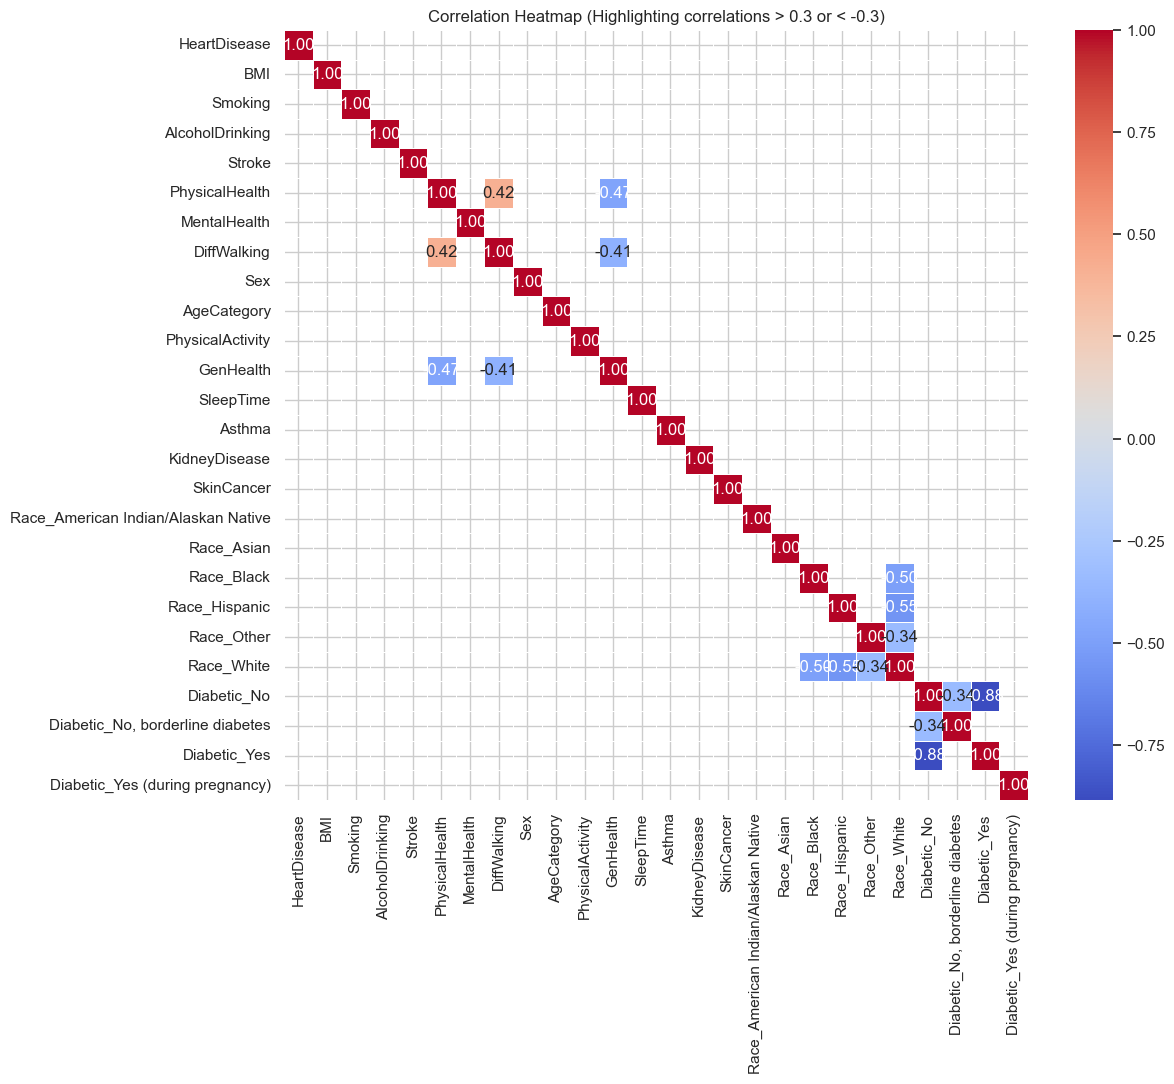

In [40]:
# Create a mask to highlight correlations above 0.3 or below -0.3
mask = (correlation_matrix > 0.3) | (correlation_matrix < -0.3)

# Plotting the heatmap to visualize the correlation between variables
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", mask=~mask)
plt.title('Correlation Heatmap (Highlighting correlations > 0.3 or < -0.3)')
plt.show()

### Model Building

### Data Scaling and Resampling

As the range for numeric variables varied widely, StandardScaler was used to scale the data. StandardScaler ensures that the features have a mean of 0 and a standard deviation of 1, this improves Model speed and performance. The data was split first to training set and Test set. The Scaler was fit and transformed on the training dataset and then the test dataset was only transformed so there is no data leakage between the training set and the test set to maintain the integrity of evolution process.

The dataset is highly imbalanced so resampling methods were used on the training set. Over Sampling, Under Sampling and SMOTE methods were used to resample the training set. Gradient Boosting Classifier Model was trained on the three different samples and evaluated to decide on best resampling methods. Over Sampling and Under Sampling methods rendered best results and Under Sampling method was selected to reduce the training time.

In [45]:
# Define features (X) and target (y)
X = encoded_data.drop('HeartDisease', axis=1)
y = encoded_data['HeartDisease']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Resampling methods
oversampler = RandomOverSampler(random_state=42)
undersampler = RandomUnderSampler(random_state=42)
smote_sampler = SMOTE(random_state=42)

# Apply oversampling
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train_scaled, y_train)

# Apply undersampling
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train_scaled, y_train)

# Apply SMOTE
X_train_smote, y_train_smote = smote_sampler.fit_resample(X_train_scaled, y_train)

# Check the distribution of classes after resampling
print("Original training set class distribution:\n", y_train.value_counts())
print("\nOversampled training set class distribution:\n", pd.Series(y_train_oversampled).value_counts())
print("\nUndersampled training set class distribution:\n", pd.Series(y_train_undersampled).value_counts())
print("\nSMOTE training set class distribution:\n", pd.Series(y_train_smote).value_counts())

Original training set class distribution:
 HeartDisease
0    216549
1     21191
Name: count, dtype: int64

Oversampled training set class distribution:
 HeartDisease
1    216549
0    216549
Name: count, dtype: int64

Undersampled training set class distribution:
 HeartDisease
0    21191
1    21191
Name: count, dtype: int64

SMOTE training set class distribution:
 HeartDisease
1    216549
0    216549
Name: count, dtype: int64


## Gradient Boosting Classifier

### Train and evaluate Gradient Boosting Classifier with each resampling method

In [48]:
model = GradientBoostingClassifier()

# Dictionary to store results
results = {}

# Training and evaluating with oversampling
model.fit(X_train_oversampled, y_train_oversampled)
y_pred_oversample = model.predict(X_test_scaled)
results['Oversampling'] = {
    'Accuracy': accuracy_score(y_test, y_pred_oversample),
    'Classification Report': classification_report(y_test, y_pred_oversample)
}

# Training and evaluating with undersampling
model.fit(X_train_undersampled, y_train_undersampled)
y_pred_undersample = model.predict(X_test_scaled)
results['Undersampling'] = {
    'Accuracy': accuracy_score(y_test, y_pred_undersample),
    'Classification Report': classification_report(y_test, y_pred_undersample)
}

# Training and evaluating with SMOTE
model.fit(X_train_smote, y_train_smote)
y_pred_smote = model.predict(X_test_scaled)
results['SMOTE'] = {
    'Accuracy': accuracy_score(y_test, y_pred_smote),
    'Classification Report': classification_report(y_test, y_pred_smote)
}

# Step 5: Display the results for each resampling method
for method, metrics in results.items():
    print(f"Results for {model}:")
    print(f"Results for {method}:")
    print(f"Accuracy: {metrics['Accuracy']}")
    print(f"Classification Report:\n{metrics['Classification Report']}\n")

Results for GradientBoostingClassifier():
Results for Oversampling:
Accuracy: 0.7281736350635147
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.72      0.83     54137
           1       0.22      0.80      0.34      5298

    accuracy                           0.73     59435
   macro avg       0.60      0.76      0.59     59435
weighted avg       0.91      0.73      0.79     59435


Results for GradientBoostingClassifier():
Results for Undersampling:
Accuracy: 0.7259695465634727
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.72      0.83     54137
           1       0.22      0.80      0.34      5298

    accuracy                           0.73     59435
   macro avg       0.60      0.76      0.58     59435
weighted avg       0.91      0.73      0.78     59435


Results for GradientBoostingClassifier():
Results for SMOTE:
Accuracy: 0.8571043997644485
Classificatio

## Logistic Regression

Model: Logistic Regression
Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.74      0.84     54137
           1       0.22      0.77      0.35      5298

    accuracy                           0.74     59435
   macro avg       0.60      0.76      0.59     59435
weighted avg       0.90      0.74      0.80     59435


Precision: 0.22
Recall: 0.77
Specificity: 0.74
F1 Score: 0.35
ROC AUC: 0.84


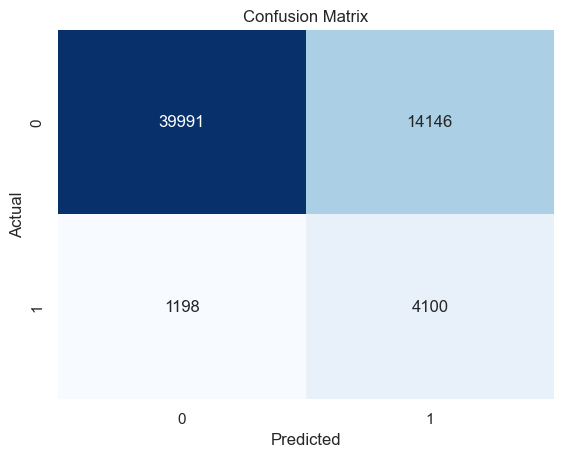

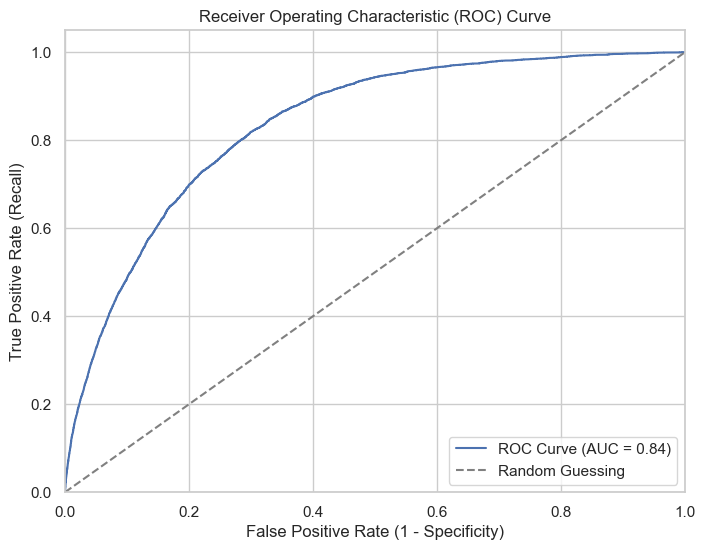

In [50]:
# Save the evaluation metrics for all models
model_results = {}

# Build Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_undersampled, y_train_undersampled)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
C_report = classification_report(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)

# Print Evaluation Metrics
print(f"Model: Logistic Regression")
print(f"Accuracy: {accuracy:.2f}")
print(f"Classification Report:\n{C_report}\n")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")


# Store evaluation metrics in dictionary
model_results['Logistic Regression'] = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'Specificity': specificity,
    'F1 Score': f1,
    'ROC AUC': roc_auc
}

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve and AUC Visualization
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guessing")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

## Decision Tree Classifier

Model: Decision Tree Classifier
Accuracy: 0.67
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.68      0.79     54137
           1       0.17      0.65      0.26      5298

    accuracy                           0.67     59435
   macro avg       0.56      0.67      0.53     59435
weighted avg       0.88      0.67      0.74     59435


Precision: 0.17
Recall: 0.65
Specificity: 0.68
F1 Score: 0.26
ROC AUC: 0.67


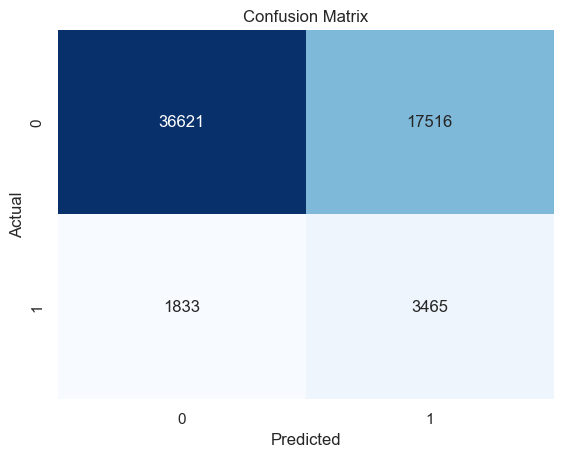

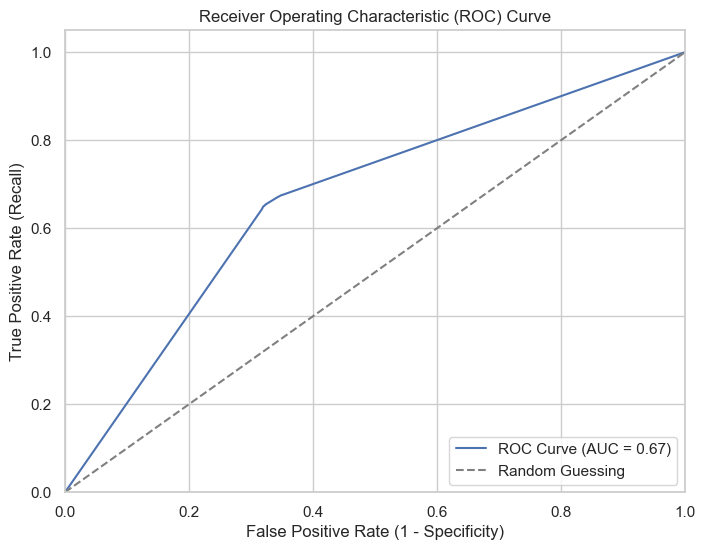

In [52]:
# Build Decision Tree Classifier model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_undersampled, y_train_undersampled)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
C_report = classification_report(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)

# Print Evaluation Metrics
print(f"Model: Decision Tree Classifier")
print(f"Accuracy: {accuracy:.2f}")
print(f"Classification Report:\n{C_report}\n")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Store evaluation metrics in dictionary
model_results['Decision Tree'] = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'Specificity': specificity,
    'F1 Score': f1,
    'ROC AUC': roc_auc
}


# ROC Curve and AUC Visualization
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guessing")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

## Random Forest Classifier

Model: Random Forest Classifier
Accuracy: 0.71
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.71      0.82     54137
           1       0.20      0.76      0.32      5298

    accuracy                           0.71     59435
   macro avg       0.59      0.74      0.57     59435
weighted avg       0.90      0.71      0.78     59435


Precision: 0.20
Recall: 0.76
Specificity: 0.71
F1 Score: 0.32
ROC AUC: 0.81


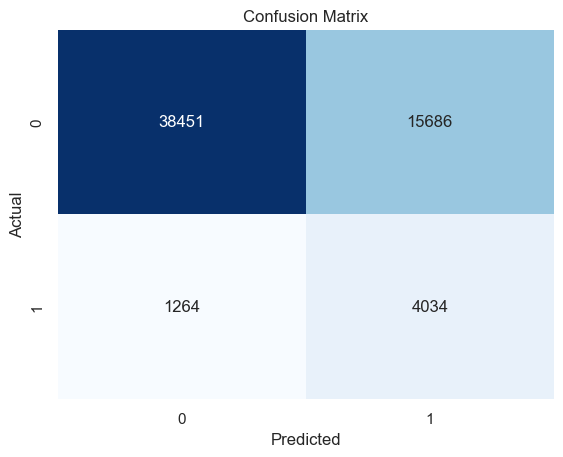

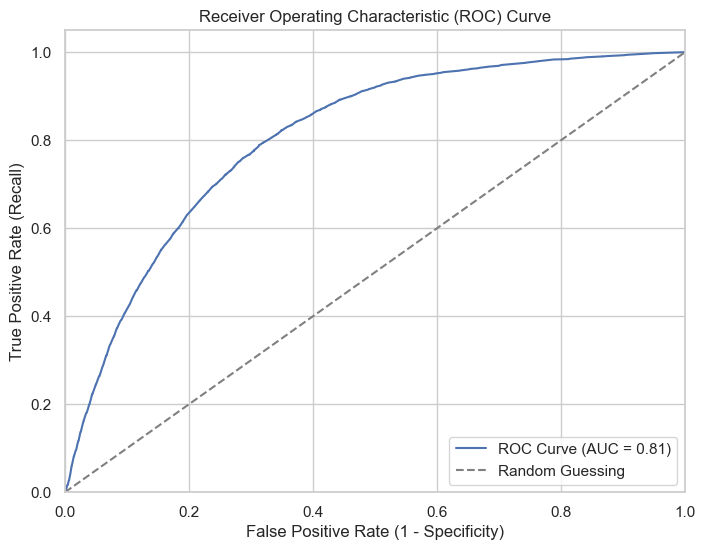

In [54]:
# Build Random Forest Classifier model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_undersampled, y_train_undersampled)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
C_report = classification_report(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)

# Print Evaluation Metrics
print(f"Model: Random Forest Classifier")
print(f"Accuracy: {accuracy:.2f}")
print(f"Classification Report:\n{C_report}\n")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

# Store evaluation metrics in dictionary
model_results['Random Forest'] = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'Specificity': specificity,
    'F1 Score': f1,
    'ROC AUC': roc_auc
}

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve and AUC Visualization
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guessing")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Improved Random Forest Classifier:
Accuracy: 0.72
Precision: 0.21
Recall: 0.81
Specificity: 0.71
F1 Score: 0.34
ROC AUC: 0.83

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.71      0.82     54137
           1       0.21      0.81      0.34      5298

    accuracy                           0.72     59435
   macro avg       0.59      0.76      0.58     59435
weighted avg       0.91      0.72      0.78     59435



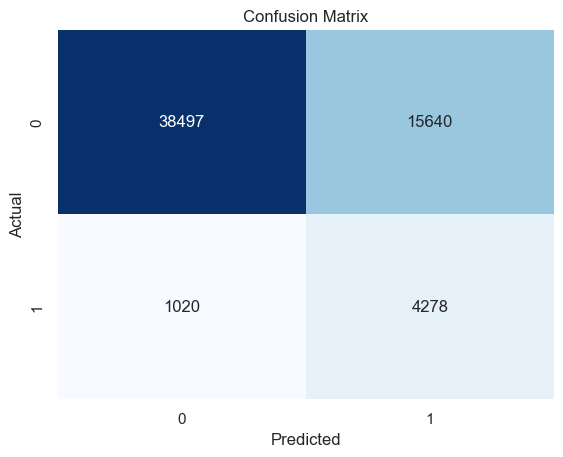

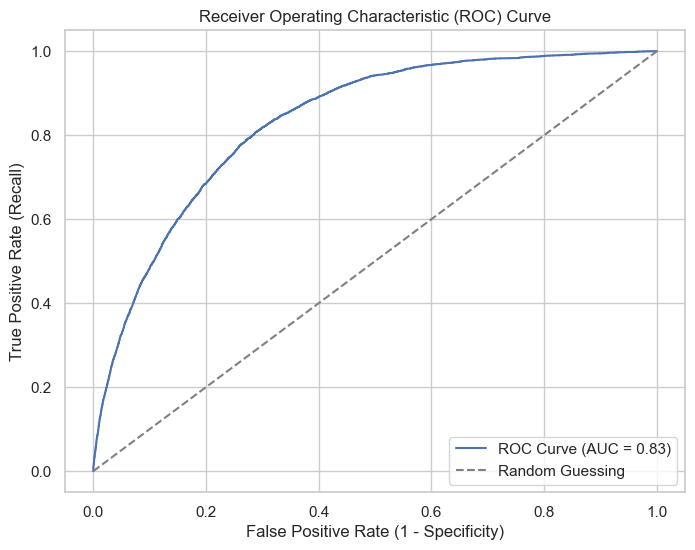

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix
)
from sklearn.model_selection import GridSearchCV, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

# Fit model on undersampled data
grid_search.fit(X_train_undersampled, y_train_undersampled)

# Best model
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Train the best model
best_model.fit(X_train_undersampled, y_train_undersampled)

# Predictions
y_pred = best_model.predict(X_test_scaled)
y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)

# Print Metrics
print(f"Improved Random Forest Classifier:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print(f"\nClassification Report:\n{classification_report(y_test, y_pred)}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guessing")
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

## KNeighbors Classifier

Model: KNeighbors Classifier
Accuracy: 0.71
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.71      0.82     54137
           1       0.20      0.74      0.31      5298

    accuracy                           0.71     59435
   macro avg       0.58      0.72      0.56     59435
weighted avg       0.90      0.71      0.77     59435


Precision: 0.20
Recall: 0.74
Specificity: 0.71
F1 Score: 0.31
ROC AUC: 0.78


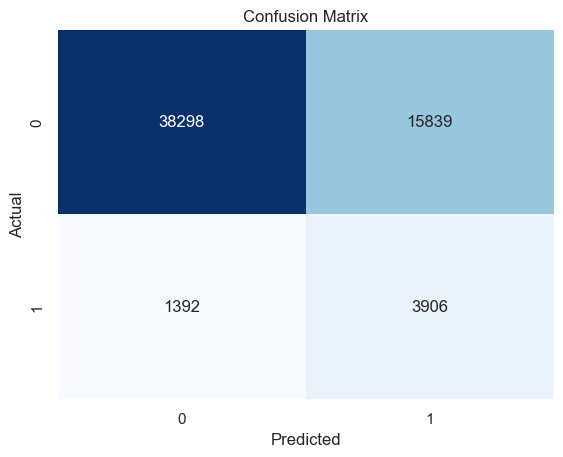

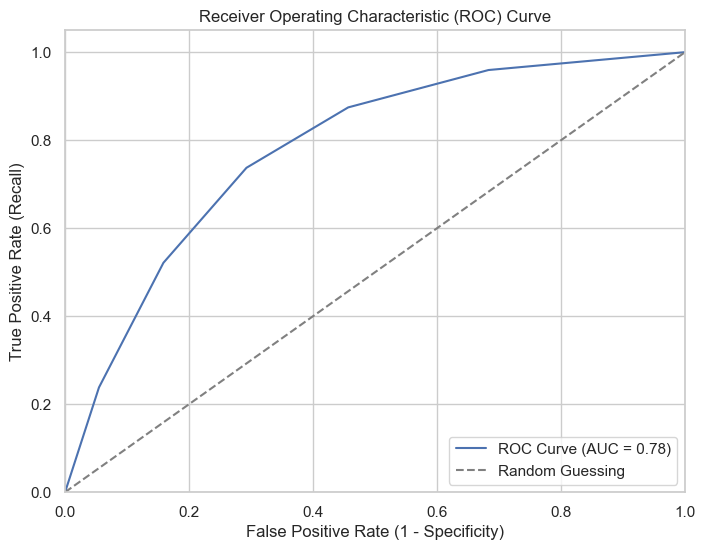

In [57]:
# Build KNeighbors Classifier model
model = KNeighborsClassifier()
model.fit(X_train_undersampled, y_train_undersampled)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
C_report = classification_report(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)

# Print Evaluation Metrics
print(f"Model: KNeighbors Classifier")
print(f"Accuracy: {accuracy:.2f}")
print(f"Classification Report:\n{C_report}\n")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

# Store evaluation metrics in dictionary
model_results['KNeighbors'] = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'Specificity': specificity,
    'F1 Score': f1,
    'ROC AUC': roc_auc
}

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve and AUC Visualization
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guessing")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

## Gradient Boosting Classifier

## XGB Classifier

Model: XGB Classifier
Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.72      0.83     54137
           1       0.22      0.78      0.34      5298

    accuracy                           0.73     59435
   macro avg       0.59      0.75      0.58     59435
weighted avg       0.90      0.73      0.79     59435


Precision: 0.22
Recall: 0.78
Specificity: 0.72
F1 Score: 0.34
ROC AUC: 0.83


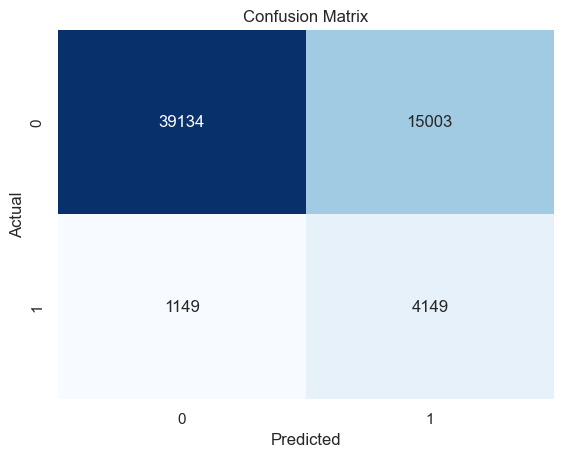

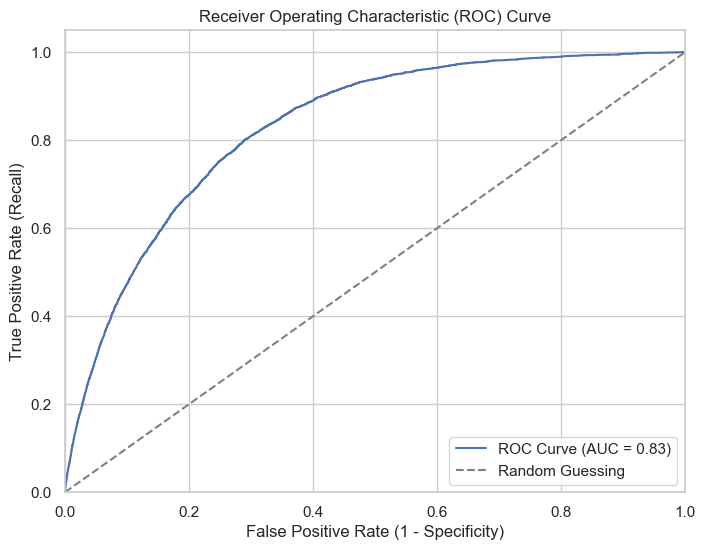

In [60]:
# Build XGB Classifier model
model = xgb.XGBClassifier(random_state=42)
model.fit(X_train_undersampled, y_train_undersampled)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
C_report = classification_report(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)

# Print Evaluation Metrics
print(f"Model: XGB Classifier")
print(f"Accuracy: {accuracy:.2f}")
print(f"Classification Report:\n{C_report}\n")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

# Store evaluation metrics in dictionary
model_results['XGB'] = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'Specificity': specificity,
    'F1 Score': f1,
    'ROC AUC': roc_auc
}

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve and AUC Visualization
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guessing")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

## AdaBoost Classifier

Model: AdaBoost Classifier
Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.74      0.84     54137
           1       0.22      0.77      0.35      5298

    accuracy                           0.74     59435
   macro avg       0.60      0.75      0.59     59435
weighted avg       0.90      0.74      0.79     59435


Precision: 0.22
Recall: 0.77
Specificity: 0.74
F1 Score: 0.35
ROC AUC: 0.83


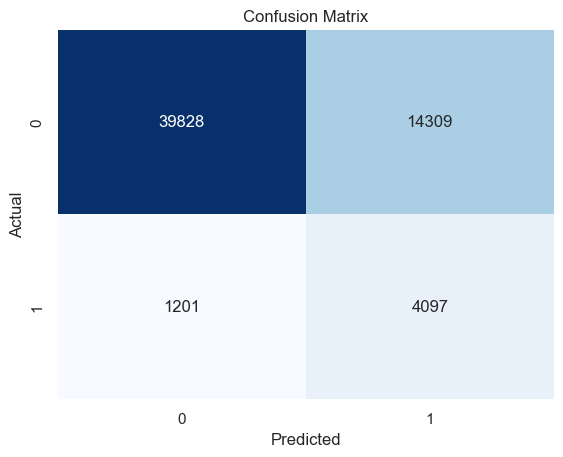

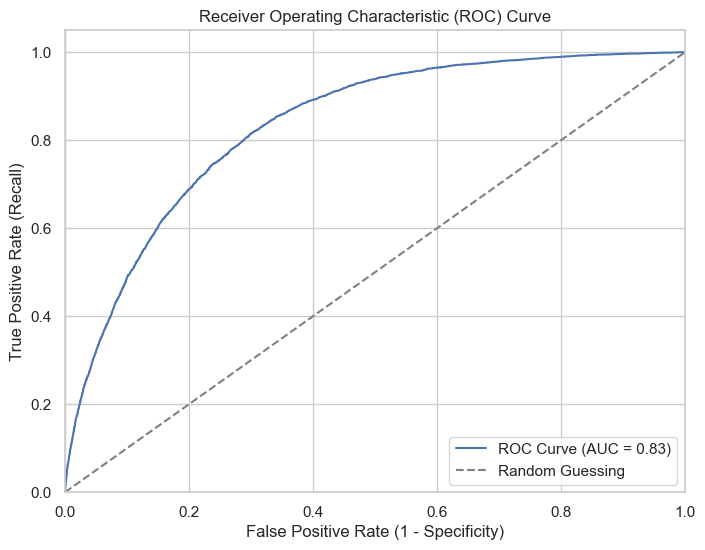

In [62]:
# model =  AdaBoostClassifier()

# Build AdaBoost Classifier model
model = AdaBoostClassifier(algorithm= 'SAMME' ,random_state=42)
model.fit(X_train_undersampled, y_train_undersampled)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
C_report = classification_report(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)

# Print Evaluation Metrics
print(f"Model: AdaBoost Classifier")
print(f"Accuracy: {accuracy:.2f}")
print(f"Classification Report:\n{C_report}\n")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

# Store evaluation metrics in dictionary
model_results['AdaBoost'] = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'Specificity': specificity,
    'F1 Score': f1,
    'ROC AUC': roc_auc
}

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve and AUC Visualization
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guessing")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

## SVM  (Support Vector Machine)



Model: Support Vector Machine
Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.72      0.83     54137
           1       0.22      0.79      0.34      5298

    accuracy                           0.73     59435
   macro avg       0.60      0.76      0.59     59435
weighted avg       0.91      0.73      0.79     59435


Precision: 0.22
Recall: 0.79
Specificity: 0.72
F1 Score: 0.34
ROC AUC: 0.84


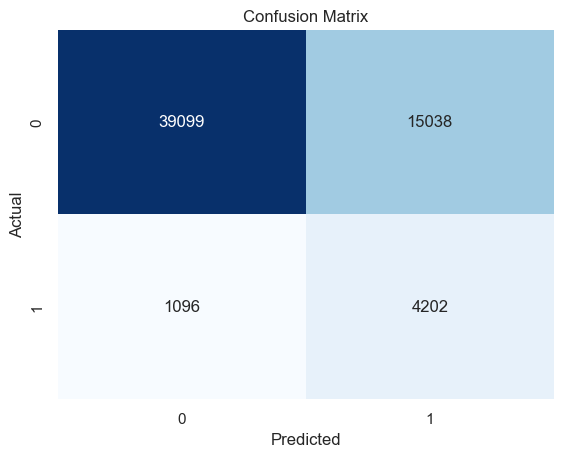

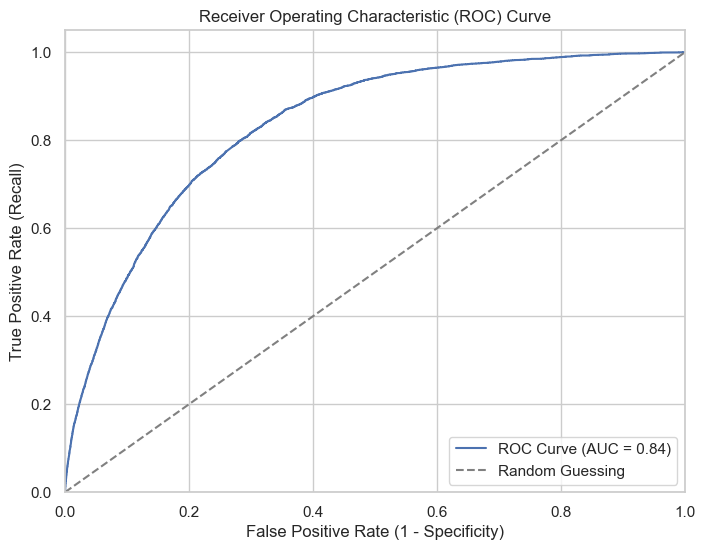

In [64]:

# Build Support Vector Machine model
from sklearn.svm import SVC

model = SVC(probability=True, kernel='linear', random_state=42)
model.fit(X_train_undersampled, y_train_undersampled)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
C_report = classification_report(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)

# Print Evaluation Metrics
print(f"Model: Support Vector Machine")
print(f"Accuracy: {accuracy:.2f}")
print(f"Classification Report:\n{C_report}\n")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

# Store evaluation metrics in dictionary
model_results['SVM'] = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'Specificity': specificity,
    'F1 Score': f1,
    'ROC AUC': roc_auc
}

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve and AUC Visualization
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guessing")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


##  Naive Bayes

Model: Naive Bayes
Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.75      0.84     54137
           1       0.21      0.67      0.32      5298

    accuracy                           0.74     59435
   macro avg       0.58      0.71      0.58     59435
weighted avg       0.89      0.74      0.79     59435


Precision: 0.21
Recall: 0.67
Specificity: 0.75
F1 Score: 0.32
ROC AUC: 0.79


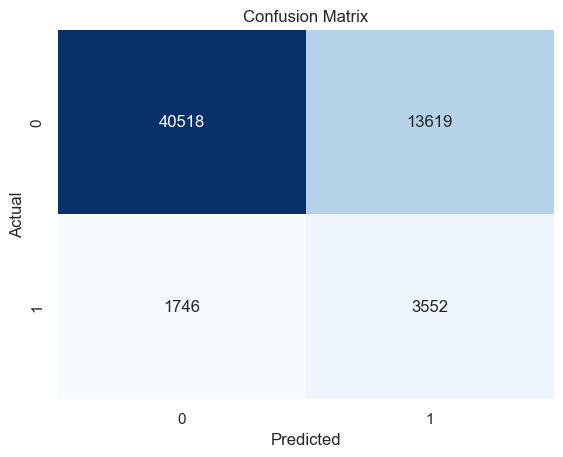

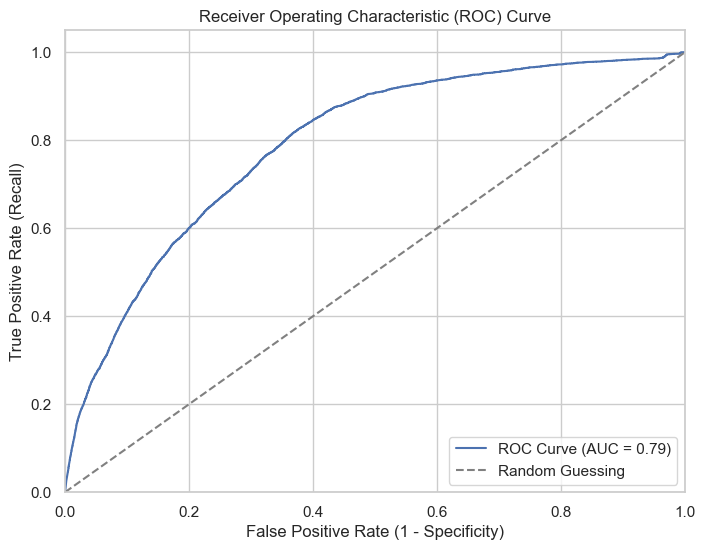

In [102]:
# Build Naive Bayes model
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train_undersampled, y_train_undersampled)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
C_report = classification_report(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)

# Print Evaluation Metrics
print(f"Model: Naive Bayes")
print(f"Accuracy: {accuracy:.2f}")
print(f"Classification Report:\n{C_report}\n")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

# Store evaluation metrics in dictionary
model_results['Naive Bayes'] = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'Specificity': specificity,
    'F1 Score': f1,
    'ROC AUC': roc_auc
}

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve and AUC Visualization
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guessing")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


## Artificial Neural Network (ANN)

In [135]:
!pip install tensorflow

Epoch 1/50


C:\Users\veena\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1325/1325 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7013 - loss: 0.5689 - val_accuracy: 0.7115 - val_loss: 0.5112
Epoch 2/50
1325/1325 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7629 - loss: 0.5000 - val_accuracy: 0.7353 - val_loss: 0.4861
Epoch 3/50
1325/1325 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7614 - loss: 0.4992 - val_accuracy: 0.7449 - val_loss: 0.4811
Epoch 4/50
1325/1325 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7627 - loss: 0.4962 - val_accuracy: 0.7326 - val_loss: 0.4858
Epoch 5/50
1325/1325 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7621 - loss: 0.4980 - val_accuracy: 0.7163 - val_loss: 0.4862
Epoch 6/50
1325/1325 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7617 - loss: 0.4955 - val_accuracy: 0.7283 - val_loss: 0.4837
Epoch 7/50
1325/1325 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7619 - loss: 0.4964 - val_accuracy: 0.7420 - val_loss: 0.4614
Epoch 8/50
1325/1325 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7635 - loss: 0.4915 - val_accurac

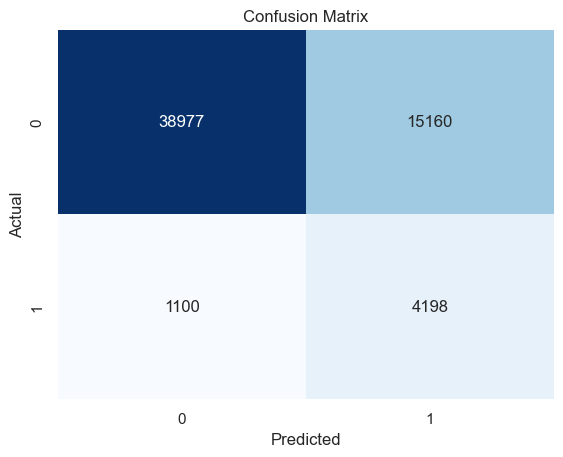

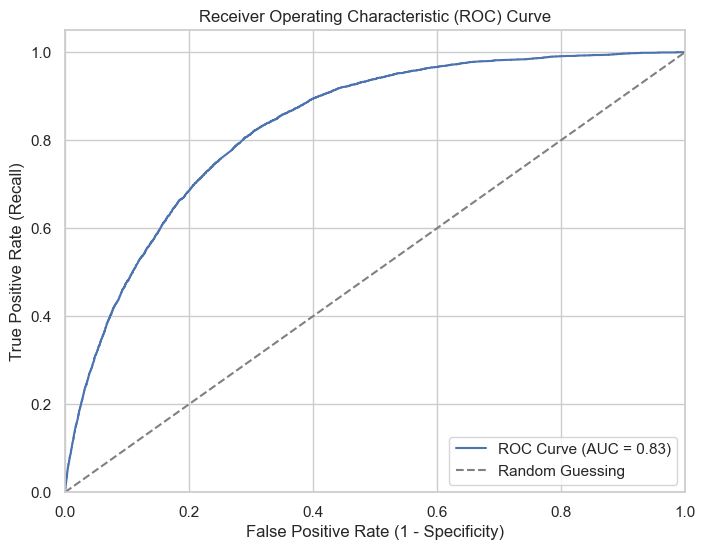

In [131]:
# Build Artificial Neural Network (ANN) model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Initialize ANN
model = Sequential()

# Input layer
model.add(Dense(units=64, activation='relu', input_dim=X_train_undersampled.shape[1]))

# Hidden layers
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=16, activation='relu'))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_undersampled, y_train_undersampled, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1)

# Make predictions
y_pred_proba = model.predict(X_test_scaled).flatten()
y_pred = (y_pred_proba > 0.5).astype(int)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
C_report = classification_report(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)

# Print Evaluation Metrics
print(f"Model: Artificial Neural Network (ANN)")
print(f"Accuracy: {accuracy:.2f}")
print(f"Classification Report:\n{C_report}\n")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

# Store evaluation metrics in dictionary
model_results['ANN'] = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'Specificity': specificity,
    'F1 Score': f1,
    'ROC AUC': roc_auc
}

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve and AUC Visualization
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guessing")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


### Medal Evaluation Results

In [133]:
# Display the results in a DataFrame
df = pd.DataFrame(model_results).T

# highlight maximum values
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

# Apply the style to the DataFrame
styled_df = df.style.apply(highlight_max)

# Display the styled DataFrame
styled_df

,Accuracy,Precision,Recall,Specificity,F1 Score,ROC AUC
Logistic Regression,0.741836,0.224707,0.773877,0.738700,0.348284,0.835454
Decision Tree,0.674451,0.165149,0.654020,0.676450,0.263709,0.668117
Random Forest,0.714815,0.204564,0.761419,0.710254,0.322488,0.805259
KNeighbors,0.710087,0.197822,0.737259,0.707427,0.311943,0.780626
XGB,0.728241,0.216635,0.783126,0.722870,0.339387,0.829510
AdaBoost,0.739043,0.222590,0.773311,0.735689,0.345680,0.832819
SVM,0.728544,0.218399,0.793129,0.722223,0.342489,0.835256
Naive Bayes,0.741482,0.206860,0.670442,0.748435,0.316169,0.790752
ANN,0.726424,0.216861,0.792374,0.719970,0.340526,0.832085
